In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [3]:
test = torch.ones(5,4); test
test[:,1].uniform_(-10.,10)
test

tensor([[ 1.0000,  8.6523,  1.0000,  1.0000],
        [ 1.0000, -6.6695,  1.0000,  1.0000],
        [ 1.0000, -9.6227,  1.0000,  1.0000],
        [ 1.0000, -3.5949,  1.0000,  1.0000],
        [ 1.0000,  6.5240,  1.0000,  1.0000]])

In [4]:
x = torch.ones(n,2) # 100x2 tensor/vector/array
x[:,0].uniform_(-1.,1) # all rows, first column create values between -1 and 1
x[:5]

tensor([[-0.8532,  1.0000],
        [-0.1248,  1.0000],
        [ 0.9993,  1.0000],
        [ 0.8833,  1.0000],
        [ 0.9416,  1.0000]])

In [12]:
x.size()

torch.Size([100, 2])

In [5]:
a = tensor(3.,2); a

tensor([3., 2.])

In [13]:
a.size()

torch.Size([2])

In [0]:
# cross product of x and a; 
y = x@a + torch.rand(n)

In [16]:
y.shape

torch.Size([100])

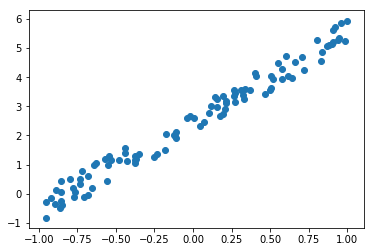

In [17]:
plt.scatter(x[:,0], y); # plot the equation with the first column of x

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() # this is your loss function

Suppose we believe `a = (-1.0,1.0)` then we can compute <mark>`y_hat` which is our *prediction*</mark> and then compute our error.

In [0]:
a = tensor(-1.,1)

In [21]:
y_hat = x@a
mse(y_hat, y)

tensor(8.1032)

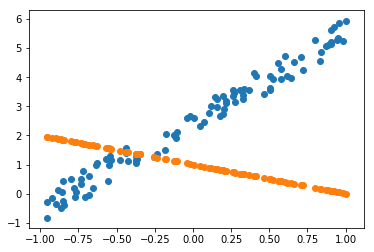

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of <mark>parameters</mark>, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

<mark>parameters: these are just the corefficients such that the line they create minimizes error between that line and the points</mark>

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [23]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a # compute prediction
    loss = mse(y, y_hat) # compute error
    if t % 10 == 0: print(loss) # defined later (print loss every now and again)
    loss.backward() # calculates the gradient and store in .grad
    with torch.no_grad():
        # note: lr is just what we multiply by the gradient (step size)
        a.sub_(lr * a.grad) # subtract coefficients from gradient in place (update coeffs)
        a.grad.zero_()

In [27]:
lr = 1e-1
for t in range(100): update()

tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)
tensor(0.0821, grad_fn=<MeanBackward0>)


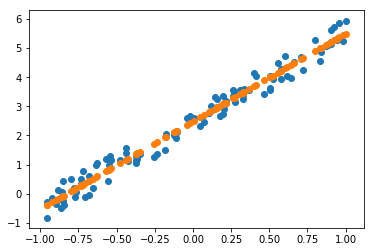

In [28]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [30]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.